In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

%matplotlib inline

In [3]:
data = pd.read_csv('home_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


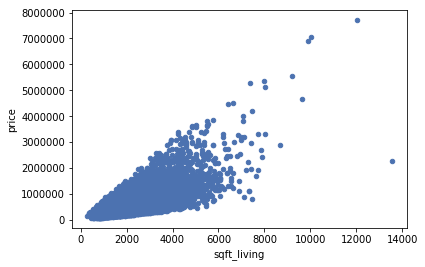

In [3]:
graph = data.plot(x='sqft_living',y='price',kind='scatter')
graph

---
---

# sqft_living Model

In [4]:
X = data.iloc[:,5].values
y = data.iloc[:,2].values
y = y.reshape(-1,1)
X = X.reshape(-1,1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
sqft_model = LinearRegression()

sqft_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
sqft_model.score(X_test,y_test)

0.47915770799654933

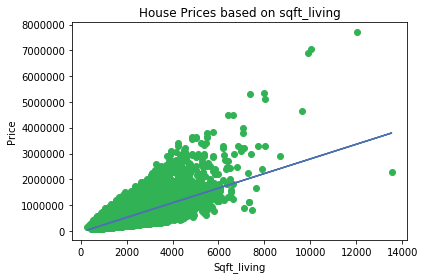

In [8]:
# Visualisation
plt.scatter(X_train, y_train, color = '#31b254')
plt.plot(X_train, sqft_model.predict(X_train))
plt.title("House Prices based on sqft_living")
plt.xlabel("Sqft_living")
plt.ylabel("Price")
plt.show()

In [9]:
data[data['id']==5309101200]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [10]:
#house1 = data[data['id']==5309101200]
house1 = data.iloc[1054,[3,4,5,6,7,-5]]
#data['id'][5]
house1

bedrooms           4
bathrooms       2.25
sqft_living     2400
sqft_lot        5350
floors           1.5
zipcode        98117
Name: 1054, dtype: object

In [11]:
data[data['id']==1925069082]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [12]:
#house1 = data[data['id']==5309101200]
house2 = data.iloc[1361,3:]
#data['id'][5]
house2

bedrooms               5
bathrooms           4.25
sqft_living         4640
sqft_lot           22703
floors                 2
waterfront             1
view                   4
condition              5
grade                  8
sqft_above          2860
sqft_basement       1780
yr_built            1952
yr_renovated           0
zipcode            98052
lat              47.6393
long            -122.097
sqft_living15       3140
sqft_lot15         14200
Name: 1361, dtype: object

In [13]:
ypred = sqft_model.predict(X_test)

ypred = mean_squared_error(y_test, ypred)
sqrt(ypred)

248879.0614364701

---
---

# My features Model


my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [14]:
X = data.iloc[:,[3,4,5,6,7,-5]].values
y = data.iloc[:,2].values

y = y.reshape(-1,1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
myfeatures_model = LinearRegression()

myfeatures_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
myfeatures_model.score(X_test,y_test)

0.499359281311758

In [18]:
data[data['id']==5309101200]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [19]:
#house1 = data[data['id']==5309101200]
house1 = data.iloc[1054,[3,4,5,6,7,-5]]
#data['id'][5]
house1

bedrooms           4
bathrooms       2.25
sqft_living     2400
sqft_lot        5350
floors           1.5
zipcode        98117
Name: 1054, dtype: object

In [20]:
data[data['id']==1925069082]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [21]:
#house1 = data[data['id']==5309101200]
house2 = data.iloc[1361,3:]
#data['id'][5]
house2

bedrooms               5
bathrooms           4.25
sqft_living         4640
sqft_lot           22703
floors                 2
waterfront             1
view                   4
condition              5
grade                  8
sqft_above          2860
sqft_basement       1780
yr_built            1952
yr_renovated           0
zipcode            98052
lat              47.6393
long            -122.097
sqft_living15       3140
sqft_lot15         14200
Name: 1361, dtype: object

In [22]:
ypred = myfeatures_model.predict(X_test)

ypred = mean_squared_error(y_test, ypred)
sqrt(ypred)

244004.77443104217

---
---

# Advanced Features Model


advanced_features = ['bedrooms',
                     'bathrooms',
                     'sqft_living',
                     'sqft_lot',
                     'floors',
                     'zipcode',
                     'condition',
                     'grade',
                     'waterfront',
                     'view',
                     'sqft_above',
                     'sqft_basement',
                     'yr_built',
                     'yr_renovated',
                     'lat',
                     'long',
                     'sqft_living15',
                     'sqft_lot15']

In [23]:
X = data.iloc[:,3:].values
y = data.iloc[:,2].values

y = y.reshape(-1,1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
advancedfeatures_model = LinearRegression()

advancedfeatures_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
advancedfeatures_model.score(X_test,y_test)

0.6949310001417899

In [27]:
data[data['id']==5309101200]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [28]:
#house1 = data[data['id']==5309101200]
house1 = data.iloc[1054,3:]
#data['id'][5]
house1

bedrooms               4
bathrooms           2.25
sqft_living         2400
sqft_lot            5350
floors               1.5
waterfront             0
view                   0
condition              4
grade                  7
sqft_above          1460
sqft_basement        940
yr_built            1929
yr_renovated           0
zipcode            98117
lat              47.6763
long             -122.37
sqft_living15       1250
sqft_lot15          4880
Name: 1054, dtype: object

In [29]:
data[data['id']==1925069082]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [30]:
#house1 = data[data['id']==5309101200]
house2 = data.iloc[1361,3:]
#data['id'][5]
house2

bedrooms               5
bathrooms           4.25
sqft_living         4640
sqft_lot           22703
floors                 2
waterfront             1
view                   4
condition              5
grade                  8
sqft_above          2860
sqft_basement       1780
yr_built            1952
yr_renovated           0
zipcode            98052
lat              47.6393
long            -122.097
sqft_living15       3140
sqft_lot15         14200
Name: 1361, dtype: object

In [31]:
ypred = advancedfeatures_model.predict(X_test)

ypred = mean_squared_error(y_test, ypred)
sqrt(ypred)

190473.37570967866

---
---

## Task 1

In [14]:
zipcode_values = data[data['zipcode']==98039]
zipcode_values

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2974,3625049014,20140829T000000,2950000,4,3.50,4860,23885,2.0,0,0,...,12,4860,0,1996,0,98039,47.6172,-122.230,3580,16054
3761,2540700110,20150212T000000,1905000,4,3.50,4210,18564,2.0,0,0,...,11,4210,0,2001,0,98039,47.6206,-122.225,3520,18564
4077,3262300940,20141107T000000,875000,3,1.00,1220,8119,1.0,0,0,...,7,1220,0,1955,0,98039,47.6328,-122.236,1910,8119
4078,3262300940,20150210T000000,940000,3,1.00,1220,8119,1.0,0,0,...,7,1220,0,1955,0,98039,47.6328,-122.236,1910,8119
4149,6447300265,20141014T000000,4000000,4,5.50,7080,16573,2.0,0,0,...,12,5760,1320,2008,0,98039,47.6151,-122.224,3140,15996
4411,2470100110,20140804T000000,5570000,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
4791,2210500019,20150324T000000,937500,3,1.00,1320,8500,1.0,0,0,...,7,1320,0,1954,0,98039,47.6187,-122.226,2790,10800
5178,6447300345,20150406T000000,1160000,4,3.00,2680,15438,2.0,0,2,...,8,2680,0,1902,1956,98039,47.6109,-122.226,4480,14406
5589,6447300225,20141106T000000,1880000,3,2.75,2620,17919,1.0,0,1,...,9,2620,0,1949,0,98039,47.6144,-122.228,3400,14400
5880,2525049148,20141007T000000,3418800,5,5.00,5450,20412,2.0,0,0,...,11,5450,0,2014,0,98039,47.6209,-122.237,3160,17825


In [15]:
average = sum(zipcode_values['price'])/len(zipcode_values)

print(average)

2160606.6


---
---

## Task 2

In [16]:
len(data)

21613

In [28]:
sqft_values = data[data['sqft_living']>2000]

In [29]:
sqft_values = sqft_values[sqft_values['sqft_living']<4000]

In [30]:
sqft_values

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
10,1736800520,20150403T000000,662500,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
15,9297300055,20150124T000000,650000,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
21,2524049179,20140826T000000,2000000,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
22,7137970340,20140703T000000,285000,5,2.50,2270,6300,2.0,0,0,...,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005
24,3814700200,20141120T000000,329000,3,2.25,2450,6500,2.0,0,0,...,8,2450,0,1985,0,98030,47.3739,-122.172,2200,6865
26,1794500383,20140626T000000,937000,3,1.75,2450,2691,2.0,0,0,...,8,1750,700,1915,0,98119,47.6386,-122.360,1760,3573
29,1873100390,20150302T000000,719000,4,2.50,2570,7173,2.0,0,0,...,8,2570,0,2005,0,98052,47.7073,-122.110,2630,6026
30,8562750320,20141110T000000,580500,3,2.50,2320,3980,2.0,0,0,...,8,2320,0,2003,0,98027,47.5391,-122.070,2580,3980
32,461000390,20140624T000000,687500,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000


In [31]:
fraction = len(sqft_values)/len(data)

In [32]:
print(fraction)

0.4215518437977143
